# Week 12: Multiple Linear Regression (MLR) (Interactive Lab)
In this exercise, you'll extend the simple regression model for BAC to include *multiple predictors* (beers, weight, and gender).

**Instructions**
1. Make sure `bac.xlsx` is in your working directory.
2. Run cells one by one.
3. Answer **Questions 1–10** in Markdown cells through Blacklboard Python Exercise Quiz 5.


## Quick Concept Check 💡
1. What is the difference between simple and multiple linear regression?  
2. Why do we need dummy variables in regression models?  
3. What assumptions must be satisfied for MLR to be valid?


In [1]:
import pandas as pd, seaborn as sns, numpy as np, statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5)
sns.set_style("whitegrid")

df = pd.read_excel("bac.xlsx")
df.head()


,id_osu,gender,weight,beers,bac,presobr,postsobr
0,1,female,132,5,0.10,10.00,6.00
1,2,female,128,2,0.03,9.50,9.25
2,3,female,110,9,0.19,9.75,4.75
3,4,male,192,8,0.12,10.00,7.50
4,5,male,172,3,0.04,10.00,9.75


**Question 1:**
What are the response and explanatory variables in this dataset?

In [3]:
df['gender_dummy'] = (df['gender'].str.lower() == 'male').astype(int)
df[['gender','gender_dummy']].head()


,gender,gender_dummy
0,female,0
1,female,0
2,female,0
3,male,1
4,male,1


**Question 2**:
How is the dummy variable for gender defined in this dataset?

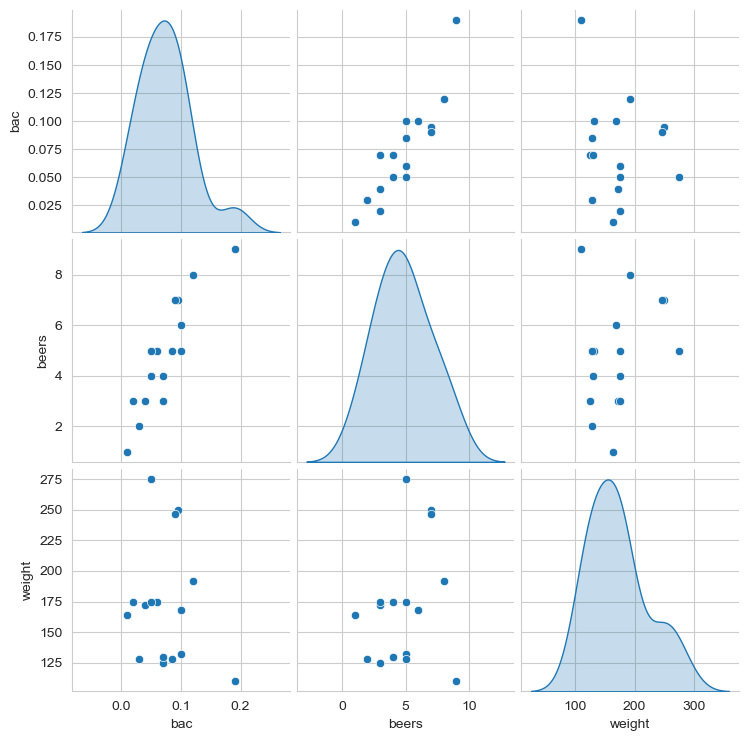

,bac,beers,weight
bac,1.000000,0.894338,-0.154963
beers,0.894338,1.000000,0.248877
weight,-0.154963,0.248877,1.000000


In [5]:
sns.pairplot(df[['bac','beers','weight']], diag_kind='kde')
plt.show()

corr = df[['bac','beers','weight']].corr()
corr


In [7]:
model_full = ols('bac ~ beers + weight + gender_dummy', data=df).fit()
model_full.summary()


C:\Users\Pollo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bac   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     80.81
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           3.16e-08
Time:                        20:55:28   Log-Likelihood:                 52.173
No. Observations:                  16   AIC:                            -96.35
Df Residuals:                      12   BIC:                            -93.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0387      0.011      3.528      0.004       0.015       0.063
beers            0.0199      0.001     15.196      0.000       0.017       0.023
weight          -0.0003   6.84e-05     -5.034      0.000      -0.000      -0.000
gender_dummy    -0.0032      0.006     -0.515      0.616      -0.017       0.010
==============================================================================
Omnibus:                        0.793   Durbin-Watson:                   2.512
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.743
Skew:                          -0.291   Prob(JB):                        0.690
Kurtosis:                       2.120   Cond. No.                         737.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question 4**: Write the fitted regression equation.

**Question 5**: Interpret β₁ (beers) in context.

**Question 6**: Interpret β₂ (weight) in context.

In [15]:
model_simple = ols('bac ~ beers', data=df).fit()
model_reduced = ols('bac ~ beers + weight', data=df).fit()
print("Full model adj R²:", round(model_full.rsquared_adj,4))
print("Reduced model adj R²:", round(model_reduced.rsquared_adj,4))

print(round(model_simple.rsquared_adj,4))


Full model adj R²: 0.941
Reduced model adj R²: 0.9444
0.7855


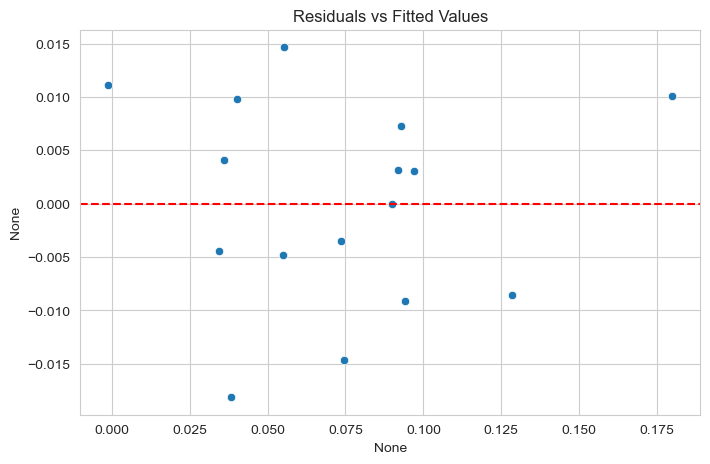

In [11]:
residuals = model_full.resid
fitted = model_full.fittedvalues
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(df[['beers','weight','gender_dummy']])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,Variable,VIF
0,const,16.770501
1,beers,1.081127
2,weight,1.465640
3,gender_dummy,1.376046


Note: The constant (intercept) often shows a very high VIF, but this does NOT indicate multicollinearity.
It results from predictors not being mean-centered.
Focus on VIF values for the explanatory variables only.

**Question 9**:
Which variable has the highest VIF, and is it concerning (>10)?

**Question 10: Reflection and Application**

Answer each part briefly:

a. When you added multiple predictors (beers, weight, gender), what changed in the R² value?  
b. What does this change tell you about model performance?  
c. Can adding more variables ever make a model worse? Explain why or why not.
